In [1]:
import pandas as pd
"""
In this nootbook, the statistics of the data set is explored, 
the dataset is available at FiveThirtyEight's github 
"""
# read in data 
movies = pd.read_csv("fandango_score_comparison.csv")

In [2]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

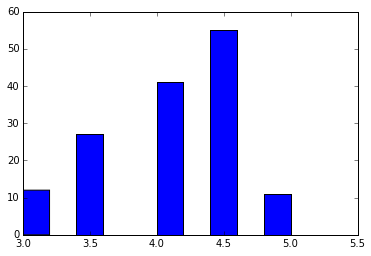

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# histogram of the "Fandago_Stars" column
plt.hist(movies["Fandango_Stars"])

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

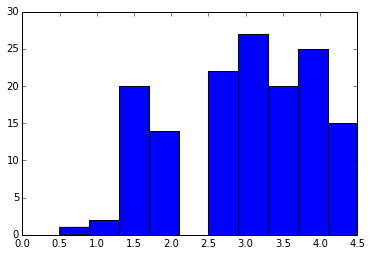

In [4]:
# histogram of the column "Metacritic_norm_round"
plt.hist(movies["Metacritic_norm_round"])

From the histogram, we can see that "Fandango_Stars" tend to have higher numbers. The mean value calculated below confirms this argument

In [5]:
mean_fandango = movies["Fandango_Stars"].mean()
mean_metacritic = movies["Metacritic_norm_round"].mean()
print(mean_fandango)
print(mean_metacritic)

4.08904109589
2.97260273973


In [6]:
import numpy as np
std_fandango = np.std(movies["Fandango_Stars"])
std_metacritic = np.std(movies["Metacritic_norm_round"])
print(std_fandango)
print(std_metacritic)

0.53853216127
0.987561029704


The fandango index has larger mean with smaller std, while the Metacritic tends to have smaller mean with larger std
Based on the different methodologies, F index is like sliding window, while M index is float. 

In [7]:
# compute the median and comparing to their means
median_fandango = np.median(movies["Fandango_Stars"])
median_metacritic = np.median(movies["Metacritic_norm_round"])
print(median_fandango)
print(median_metacritic)

4.0
3.0


Note that the median value for F index is less that its mean value, indicating that the upper half have higher ratings. While for M index, which is greater than mean values, implying that the lower half poions dominate a bit more 

In [9]:
# sort the movie for diff between M and F index
movies["diff_f_m"] = abs(movies["Metacritic_norm_round"] - movies['Fandango_Stars'])
sorted_movies = movies.sort("diff_f_m", ascending = False)

In [10]:
sorted_movies.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,diff_f_m
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4,1.0,2.5,2.5,31,3136,1793,0.5,4
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4,1.5,3.0,3.5,38,5927,811,0.2,3
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3,1.5,2.5,2.5,108,19222,6835,0.3,3


In [12]:
# exptloring the correlation between F and M
# this is a good indicaiton whether F is consistently higher than M
from scipy.stats import pearsonr
r, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print(r)

0.178449190739


The correlation is not large at all. It looks like it is not the case that the F index is inflated simply. From some reason, it seems indicating that F and M index is essentially different

In [14]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err_slope = \
    linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [15]:
predict3 = slope * 3 + intercept
print(predict3)

4.09170715282


In [16]:
print(slope * 4 + intercept)

4.1890182308


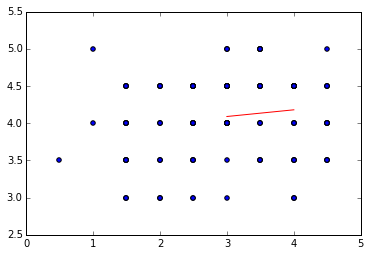

In [17]:
from matplotlib import pyplot as plt
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([3, 4], [4.09, 4.18], color = 'r')
plt.show()